## 513 Lecture 1: What is a Database? ACID, Tables & Transactions

### What is a Database?

- Idea in 1970s:
    - You have the data, but you also have a map of the data
    - Data exists in sets and we have these smaller chunks of sets that have some sort of metadata associated with them.
    - If you need to look for information in the data table itself, when it is big, the data retrieval process is very time-consuming.
    - So, you store the metadata about the data, and when you want to find a piece of information in the data. Then you can search information about the metadata. If it finds a block that stores the metadata, then go to the disk or memory, and it just has to do a sequential search in the section. 

* Formal definition of database
    - A database is a collection of data, organized into smaller elements (nodes, tables, documents) that may or may not have relationships to one another.
    - A database is managed by a Database Management Server.
    - A database is accessed using some form of query language (e.g., Structured Query Language - SQL, sparQL, cypher . . .).

### DBMS (Database Management Servers)

#### Definition

- A system that manage a database.
- The principle of a database are effectively to manage data better. 
    - A DBMS is built to optimize the management of data. 
    - In particular, a DBMS is optimized for reading and writing data to and from disk. 
- DBMS systems are often used for managing volumes of data larger than the user memory, so much of the work in optimizing a database is structured around how to minimize the number of read/write operations performed to disk.

#### Structure of database
- Data warehouse
    - is optimized for rapid access to commonly queried data.
- Document database
    - is structured to store and retrieve unstructured data.
- Relational database
    - is structured to provide highly scalability, and minimize total database size.

#### Key properties of a DBMS
- ACID - Atomic, Consistent, Isolation, Durability
- The unit of operation within an ACID database is the **transaction** (one command or multiple commands). 

**Atomic**
- Atomic means that when a set of commands tries to modify data, if any one of the commands fails, then the entire transaction will not be processed. (nothing will happen.)
- Entire transaction is considered as one atomic unit.


**Consistent**
- One of the strengths of databases.
- All data within the database follows **the defined rules for the database**, the defined rules for any one table and the defined rules for any one field. 
- All operations on the database will return the **same value, each time, given the same set of underlying data**.
- A database that ensures consistency would reject any transaction where the final result of the transaction violates the constraints.


**Isolation**
- Particularly important when there are a large number of users and a large number of transactions occurring at the same time.
- The idea of isolation means that any one atomic transaction operates as an atomic unit and it operates in isolation from any other transaction by another user.
- When a transaction acts on the data, the tables or rows on which it is acting are effectively locked to other transactions.
- If two transactions modify the same table, the sequence of operations will ensure that the first transaction completes before the second transaction can change the data.


**Durability**
- The results of any transaction that completes successfully are permanently stored within the database.
- You don't lose the data. 

#### How does a DBMS store data better?
- In-memory access is quick, reading and writing to disk is slow. So, if we are developing a data science pipeline that will involve much data manipulation, we want to minimize the number of times we access the disk.
- Usually when we manipulate a single row in the data table, we need to check every single row in the table. 

**A way for a DBMS to improve efficiency**
- Along with storing the data for a particular database, the DBMS is also able to create a map of the data within the database. 
    - We can imagine that sets of rows are stored in discrete locations on the disk. These are referred to as "page files".
    - The DBMS abstracts data by building a map to the data on disk. 
- Each page file has a physical address on the disk, each address is mapped within the database, along with metadata about the contents of the pagefile, relative to a field.


**Example**
- In an optimized database the `filter()` call doesn't have to search through every row (which would require that it read from the disk, or memory). 
- Instead of looking through every row of data, the DBMS looks to the **address table** for the physical addresses of page files that contain suitable data.
- This means that, overall, there are **less read/write operations** on the data over time, and so we are less limited by disk access.

#### How does a database structure data? (relational database)

**Entities & Relationships**
- Entity: a thing,
- Relationship: define elements of that thing.
- Example:
    - "The store has a rating" : two things (store, a rating) and one relationship (store **has** a rating)
    
    
**Table**
- Fundamental unit of work within a database. (set of rows)
- A table consists of:
    - Column definition: variable types for each column
    - Constraints: a defined set of rules about what data is acceptable within a table
    - Index: a blueprint for filtering or selection data within the table
    - Foreign key: references to data with other tables


**Tuples**
- Discrete elements within a table (a discrete unit of knowledge)
- Ordered, immutable
- Within a relational database it is (generally) not possible to directly call for a specific tuple, i.e., tuples do not exist independently of tables or schema.


**Schema**
- A schema is generally used to represent a **coherent data model** within a database.
- The data model may be defined in part by **user permissions**. 
    - For example, a database may contain all university data, but a particular schema may represent only **data that can be accessed by Human Resources**, and another by the Registrars Office.
- In Postgres one schema is used for the database itself, to store information about the database (the database catalog). (??)


**Database**
- The collection of schema for a particular data application.

#### How does a database manage interactions?
- A most modern databases allow access to multiple users, with different permissions.
- It is better to provision multiple user accounts with clear permissions for particular tasks.
    - For example, the account `neotomawriter` can writes and modifies Neotoma functions. The account `neotomareader` can only read applications for the API, and should not have permissions for any tables outside the scope of the Neotoma API. 
- Any user who connects to a database can then send a single query, or a set of linked queries within a transaction.
- Databases can have multiple connections active at any one time.

#### Connecting with a DBMS

**In Python:**
```python
with open('data/connection.json') as f:
    db = json.load(f)
    
conn = psycopg2.connect(**db)
```

- Contents inside `connection.json`

```json
{
  "host": "dsci513-nd.cav7xnmmiw5l.us-east-1.rds.amazonaws.com",
  "port": 5432,
  "user": "student",
  "password": "studentPassword",
  "dbname": "postgres"
}
```


**In R:**
```r
conString <- jsonlite::fromJSON('data/connection.json')

con <- dbConnect(PostgreSQL(),
                 host=conString$host,
                 port=conString$port,
                 user=conString$user,
                 password=conString$password,
                 dbname = conString$dbname)  # connect my local computer with the database server
                 
dbListTables(conn = con) # return tables in the database.

wp <- dbReadTable(con, c("neotoma.westernpollen")) # access to a particular table
```

- I send the query to the server, the server does the search for me, and then it passes that subset of information back.
- It is way faster as it doesn't use local computer's memory, and the database is optimized for searching information.

#### Lab1
- Database : data itself
- Database management system: system that you can manage database
- Relational: smaller tables that are related
- SQL: Structured query language. A programming language. 
- An instance of DBMS can have multiple databases. 

**Database, schema, table**
- Database: Everything. (House)
- Table: Within database, I have tables. Logical groups. (Room)
- Schema: How different tables are related to one another. (Floorplan)

#### R vs DBMS: Fight!
- If the database is remote (or even on a local server), the full dataset is never actually in memory. What you have in memory is a connection to the database.
- All you send to the database is a text string query (either directly, or through a function in R or Python that constructs the query for you). What you get back is either a data object, or a pointer to a data object stored by the database.
- Because databases are optimized for data management, they often have very intelligent ways of memory management, which means that once a particular query is optimized, it will be much faster if it is called a second, third, fourth or fifth time 

(add 3.2)

## Lecture 2: Normalization

### Wide-format vs. Entity-relationship
- Wide-format tables are easy to create, easy to see all information
- However, they enforced a strict data model that causes update & insert & delete anomalies, and their dependencies are not obvious:
    - When we update a customer's name "Jimbo" to "Jambo", we cannot change all individual order data associated with "Jimbo" to "Jambo" at once.
    - When we want to add a new customer, we may need to repeat some information that is already existing.
    - When we want to delete all the information associated with a customer, we might delete information such as ratings of a product, etc.
- Entity-relationship model can solve this problem.

### Entities and Relationships
- Entities: things that can be uniquely identified, and can be defined independently of other elements.
    - Physical objects: boats, moats, goats, or events: parade, election, house sale
- Thinking about the raw data as entities with relationships can help us model the data better.
    - This helps us break our data apart into reasonable tables to improve the performance of the database.
    - This helps us frame our data model.
        - We can be very precise in defining the properties of an entity and the way a relationship is formed.
        - Clear constraints and definition
    - This helps us formalize the work we want the database to do for us in our analytic workflows.
        - much cleaner data analysis workflow
        

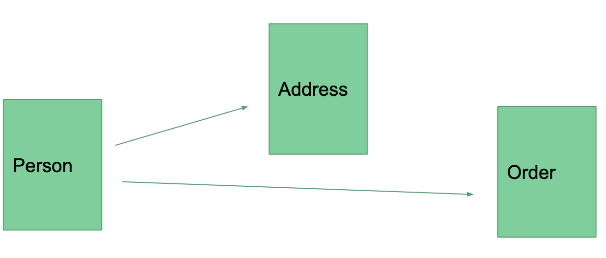

### Normalization
#### What is normalization?
- The process of taking complex data and breaking it into a number of smaller tables, and enforcing relations among the tables.
- It provides the theoretical framework to help ensure the model is optimized.

#### Why do we need normalization?
- It can minimize repetition of data.
- It can ensure clear dependence between tables.
- It can help us manage tables and data, let us put clear constrains on fields, and optimize our data model to improve query speed and effectiveness.

#### Normal Forms
##### 1NF
- The first form requires:
    - No repeated tuples
    - All fields are atomic (cannot be sub-divided)
    - There is no meaning to row or column ordering


- This is the problem!

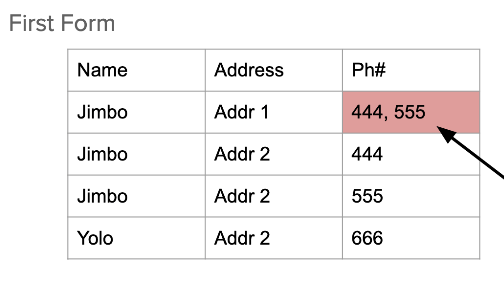


- So, we need to separate the red field! 

##### 2NF
- The second form requires:
    - No repeating groups
    - No column is functionally dependent on only a subset of the candidate key

**No repeating groups**
- The table below has repeating groups: (Forte-Italy), (Hoch-Germany)

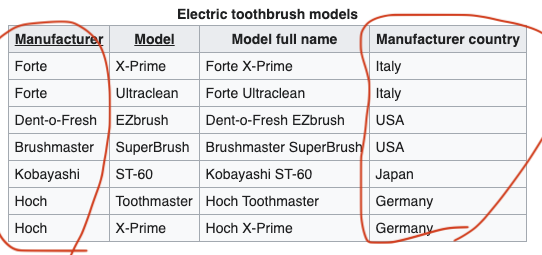

- Therefore, this one table should be divided into two:

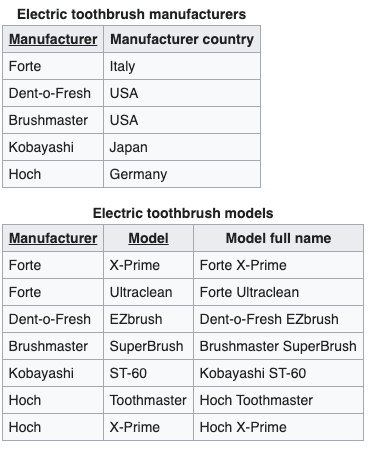


**No column is functionally dependent on only a subset of the candidate key**

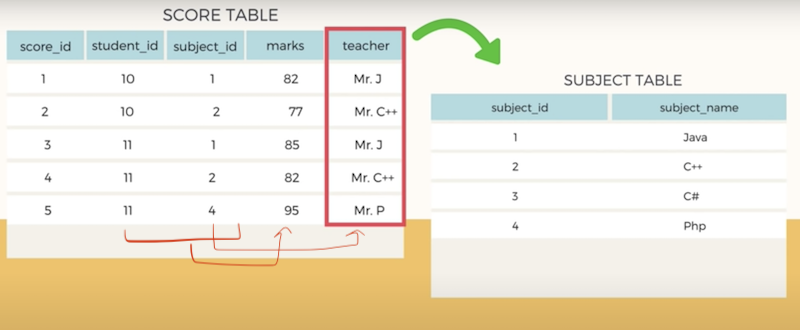

- Here, the `teacher` column only depends on `subject`, not on `student`.
- However, the candidate key (primary key) here is a pair of `subject` and `student`.
    - They decide the marks.
- Therefore, the `teacher` column should be moved, or inserted in another table.

##### 3NF
- The third form requires:
    - No fields are transitively dependent on the candidate key.

**Transitive dependency**
- When a non-key attribute determines another attribute, it is called "transitive dependency".
- There should be only primary key dependencies! 

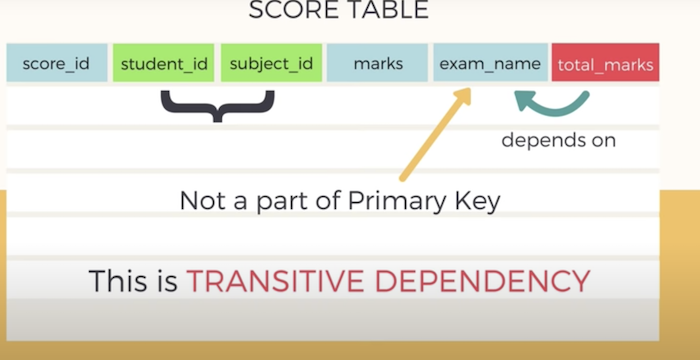

### Normalization with a dataset

#### First Normal Form
1. Check whether there are duplicates.

```r
duplicates <- dbGetQuery(con, 
                         "SELECT id, sitename, COUNT(*)
                          FROM neotoma.westernpollen
                         GROUP BY id, sitename, depth, age, ageold, ageyoung, datetype, lat, long, dataset, taxon, count
                         HAVING COUNT(*) > 1")
```
- Count the whole rows, and filter the columns where any of the rows grouped by `id, sitename, ...` appears more than 2 (checking duplicates). Return id and sitename of those rows. 

2. Clean up duplicates.

```r
cleanQuery <- "
  SELECT   id, sitename, depth, 
           age, ageold, ageyoung, 
           datetype, lat, long, 
           dataset, taxon, count, 
           COUNT(*)
  FROM neotoma.westernpollen
  GROUP BY id, sitename, depth, 
           age, ageold, ageyoung, 
           datetype, lat, long, 
           dataset, taxon, count"

newTable <- dbGetQuery(con, cleanQuery)
```
- Here, because we are grouping by every single field in the table, anytime there is a duplicate, that duplicate will get collapse down to a single row.

3. Check Atomicity.
    - Is there any columns that contain tuples that are not atomic? (lat, long)
4. Check whether orders matter.
    - Is there any columns that orders matter?

#### Second Normal Form
1. Check repeating groups

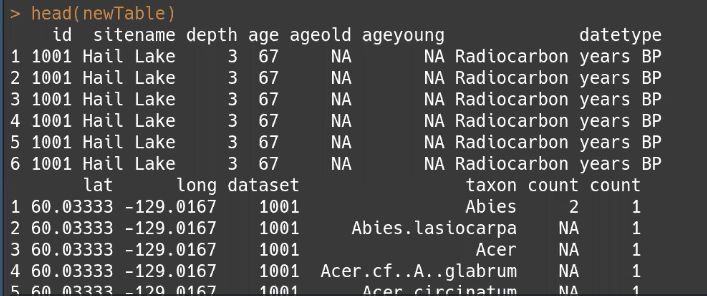

- There are definitely repeating groups!
    - (sitename-depth-age-ageold-ageyoung-...)
- We need to separate them into different tables.

**Primary Key, Foreign Key**
- Each table has **a set of page files** containing the data. 
- The database itself has **an information schema** that contains information about each table. 
- Primary key: the set of fields (where the set can be n≥1) that **uniquely defines each tuple within a table**. 
- Foreign key: used where the primary key of one table is needed **within a second table**.
    - The primary key of our table (in 1NF) is `sitename`, `lat` and `long` since it is the combination that makes the unique record. 


2. Solving repeating groups
- Make separate tables!

```r
dateTable <- dbGetQuery(con, "
                        SELECT DISTINCT datetype
                        FROM neotoma.westernpollen")

taxaTable <- dbGetQuery(con, "
                        SELECT DISTINCT taxon
                        FROM neotoma.westernpollen")
```

    - Here, we are creating `datetype` table and `taxa` table.


**Create a new table excluding repeating groups**

```sql
CREATE TABLE IF NOT EXISTS neotoma.sites (
  siteid     SERIAL PRIMARY KEY,
  sitename   CHARACTER VARYING,
  lat        DOUBLE PRECISION,
  long       DOUBLE PRECISION,
  CONSTRAINT  validlong CHECK  (long BETWEEN -180 AND 180),
  CONSTRAINT   validlat CHECK  (lat  BETWEEN  -90 AND 90),
  CONSTRAINT uniquesite UNIQUE (sitename, lat, long));
```

- Use the Data Definition Language capabilities of Postgres (DDL) to create these tables
    - You can add constrains in this stage. 
    - `SERIAL` : create a surrogate primary key.
    - `uniquesite` constraint: ensure the site is unique.


```sql
CREATE TABLE IF NOT EXISTS neotoma.taxa (
  taxon CHARACTER VARYING,
  PRIMARY KEY (taxon));
  
CREATE TABLE IF NOT EXISTS neotoma.datetypes (
  datetypes CHARACTER VARYING,
  PRIMARY KEY (datetypes));
```
        
- Creating `taxa`, `datetypes` tables


```sql
CREATE TABLE IF NOT EXISTS neotoma.samples (
  sampleid SERIAL           PRIMARY KEY,
  depth    DOUBLE PRECISION NOT NULL,
  age      DOUBLE PRECISION,
  ageyoung DOUBLE PRECISION,
  ageold   DOUBLE PRECISION,
  siteid   INTEGER          REFERENCES sites(siteid),
  CONSTRAINT uniquesample UNIQUE (sampleid,depth));
);

CREATE TABLE IF NOT EXISTS neotoma.samplecounts (
  count    DOUBLE PRECISION,
  taxon    CHARACTER VARYING REFERENCES taxa(taxon),
  datetype CHARACTER VARYING REFERENCES datetypes(datetype),
  sampleid INTEGER           REFERENCES samples(sampleid)
);
```

- Creating `samples`, `samplecounts` tables
    - `REFERENCES` : specify a foreign key. It creates relations between tables. 

* Tables in 2nd NF

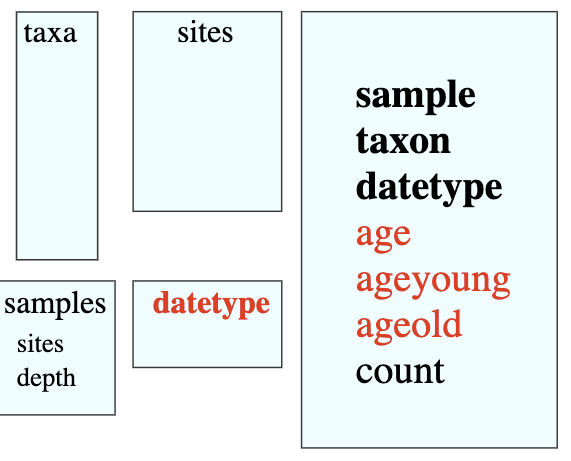



#### Third Normal Form

1. Check transitive dependency
- Transitive dependency: When a non-key attribute determines another attribute, it is called "transitive dependency".
- In the `samples` table, the primary key is `siteid` and `depth`. However, `age`, `ageyoung`, `ageold` only depend on `depth` not `siteid`. 

> Why do we want to remove the partial dependencies?
> 
> - It is because since they are dependent, not just on the primary table, but also probably on some other information. It makes better sense to have them as their own relation. It helps reduce insert and update anomalies, because they are only partially related to the key, which means that other information could influence them and it also winds up leading to other issues of duplication down the down the road. It also means it's harder to change them and manage them within the context of a workflow.

2. Separate transitive dependency into different tables, and relate them using foreign keys

```r
ageTableDDL <- "
DROP TABLE IF EXISTS neotoma.sampleages;
CREATE TABLE IF NOT EXISTS neotoma.sampleages (
  sampleid  INTEGER REFERENCES neotoma.samples(sampleid),
  age      DOUBLE PRECISION,
  ageyoung DOUBLE PRECISION,
  ageold   DOUBLE PRECISION,
  datetype CHARACTER VARYING REFERENCES neotoma.datetypes(datetype),
  CONSTRAINT agesample UNIQUE(sampleid, datetype));"

dbExecute(con, ageTableDDL)
```

```r
ageTable <- "
  SELECT DISTINCT smp.sampleid,
         wp.age,
         wp.ageyoung,
         wp.ageold,
         dt.datetype
  FROM neotoma.westernpollen AS wp
    JOIN neotoma.datetypes AS dt ON wp.datetype = dt.datetype
    JOIN neotoma.sites     AS st ON 
      (wp.sitename, wp.lat, wp.long) = (st.sitename, st.lat, st.long)
    JOIN neotoma.samples AS smp ON 
      (st.siteid, wp.depth) = (smp.siteid, smp.depth)
WHERE wp.count > 0"
```

### Connecting Data
- After the database is normalized, we can ask questions: How far north was pine pollen at various times in the past?

```sql
SELECT MAX(st.lat), ROUND(age::numeric, -3) AS millenia
FROM neotoma.sites AS st
JOIN neotoma.samples AS sm ON st.siteid = sm.siteid
JOIN neotoma.sampleages AS sa ON sa.sampleid = sm.sampleid
GROUP BY millenia
ORDER BY millenia DESC
```

- Get the latitude at various time bins.
- We have now normalized the data, so we are able to write some efficient queries to ask important ecological questions.

## Lecture 3

### Data constraints and tables

#### 1. How does a database manage memory?
- There are four places where a computer can store information
    - Cache : Data that is being used by the CPU, fastest access
    - RAM
    - Flash/SSD
    - HDD : The slowest access.
- The goal of a database and most applications in general is to keep the data that we're operating data as close to the CPU as possible.
    - Database can store some information in RAM, but also needs to store some data in HDD.
    - One way that the database can do this is that it really needs to know what kind of data is available and where data is at any one time. 
    - To be **explicit** in terms of mapping out what data is in the database. 

#### 2. Database optimization
- Clearly define data structure and size (tables, pages, data types & relationships)
    - Pre-define the space that you need for an object 
- Plan operations prior to execution (EXPLAIN, primary keys, indexing)
    - When we write a SQL query, the database doesn't actually step through them in the order. 
    - It actually assesses costs for various operations, and execute the one that is the fastest. 
    

#### 3. Database data storage
- Databases manage data in table files which contain `pages`.
    - Pages: Internal basic structure, Units of data. 
- Page structure is based on the table definition.
- We define the data using the DDL (Data Definition Language)
    
    ```sql
    CREATE TABLE IF NOT EXISTS neotoma.sites (
        siteid      SERIAL PRIMARY KEY
        sitename    CHARACTER VARYING
        lat         DOUBLE PRECISION
        long        DOUBLE PRECISION);
    ```
- Each data type has its fixed storage size.
    - Integer (4 bytes), double precision (8 bytes), ...

#### 4. Page structure
- The page stores information about one or more rows
-  A database has multiple tables that are stored in table files and then the **page is an eight kilobyte chunk** that references each tuple.
    - You can have multiple tuples in a page.
- Each page is identified by and contained within the table file

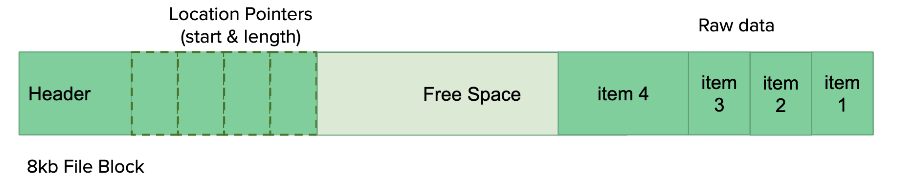

- If we define the table, the file will look like this:

- 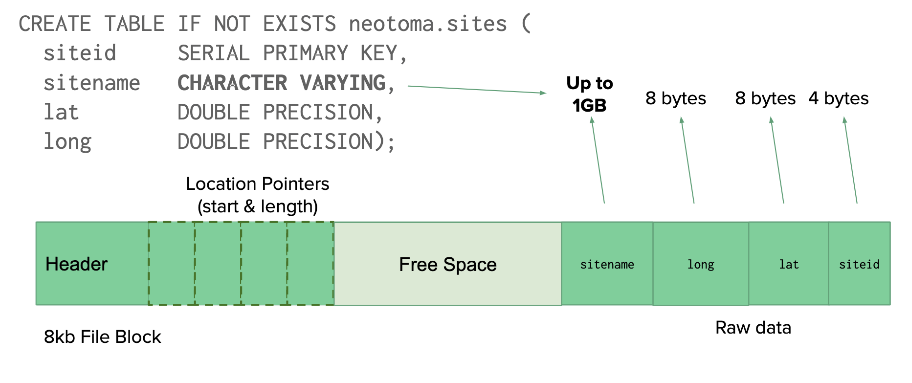

    - Each individual tuples will be defined by a page.
    - Header: What Postgres finds during searching.
    - Location Pointers: (pointer) tells you where the data is stored.
    - Every page file basically is going to look the same. 
        - It means that when it's doing any sort of optimization on the joins or etc, it makes it easier to find the page file quickly.

    - Because one file block is 8 kb, we need a separate space where we can store `sitename`. -> `TOAST Table`
    

**TOAST Table**
- The Oversized Attribute Storage Technique
- Tuples over 2kb will be compressed into a pointer, and store the actual data in a TOAST table.

    - The toast table stores these very large objects from multiple rows
    - But each page for a tuple stores the pointer to that very large option (a toast table).

#### 5. Primary key and foreign key
- Primary key : A unique constrain and non-null, and it creates an index.
    - The index maps **table pages by values** within fields.
    - The map speeds up searching.

- Foreign key : Non-null constrain, references (and constrained) by another table. 
    - Foreign key makes postgres easy to join tables.
    - Foreign key ensures referential integrity.

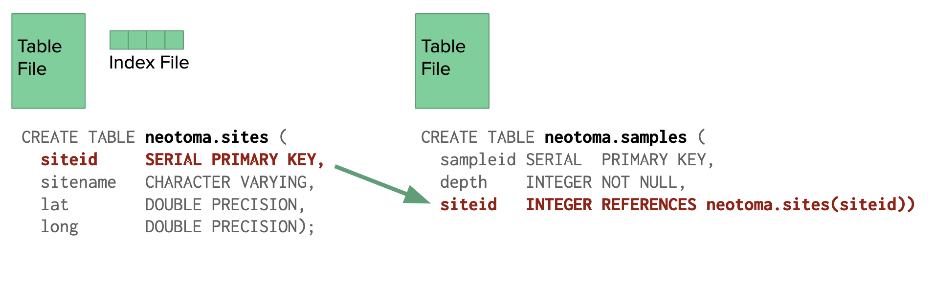

```sql
CREATE TABLE neotoma.sites (
    siteid     SERIAL PRIMARY KEY,    --define siteid as a primary key
    sitename   CHARACTER VARYING,
    lat        DOUBLE PRECISION,
    long       DOUBLE PRECISION);


CREATE TABLE neotoma.samples ( 
    sampleid   SERIAL PRIMARY KEY,         --This is a primary key of this table (neotoma.samples). (index) 
    depth      INTEGER NOT NULL,           --It is good to have a primary key even if it has a foreign key.
    siteid     INTEGER REFERENCES neotoma.sites(siteid));   --define siteid in neotoma.sites table as a foreign key
    
```

#### 6. Constructing a table
- Construct by DDL

```sql
CREATE TABLE schema.tablename (
    fieldone   TYPE,
    fieldtwo   TYPE,
    fieldthree TYPE);
```
- Table definition helps define the table and the space allocation for the table and pages within the table. 
    - This also speeds up searching!
- Because it is static, when we want to change the definition of a table (such as variable types, deleting fields) 
    - we need to **drop** the table and reallocate the space.
    - In pandas, or in R, it is easy, but not in Postgres.
- Because it is static, searches are much faster, managing memory and data is much more easier.

#### 7. Two ways of defining primary keys and foreign keys

1. Primary key
```sql
CREATE TABLE schema.tablename (
    fieldone INTEGER PRIMARY KEY,
    fieldtwo VARCHAR(3),
    fieldthree DATE);
    
    -- or --
```

```sql
CREATE TABLE schema.tablename (
    fieldone INTEGER,
    fieldtwo VARCHAR(3),
    fieldthree DATE,
    CONSTRAINT prim_field PRIMARY KEY(fieldone));
```

2. Foreign key

```sql
CREATE TABLE schema.tablename (
    fieldone INTEGER REFERENCES othertable(field),
    fieldtwo VARCHAR(3),
    fieldthree DATE);
    
    -- or --
```

```sql
CREATE TABLE schema.tablename (
    fieldone INTEGER,
    fieldtwo VARCHAR(3),
    fieldthree DATE,
    CONSTRAINT REFERENCES othertable(field));
```

#### 8. Why do we add constraints in fields?
- By adding constraints, we can:
    - ensure accuracy of data
    - make data expectations explicit
        - improve memory management efficiency
        - improve query search speed
    - provide clear error messages
        - violating a constraint returns an error identifying the constraint
        
- Keywords:
    - `NOT_NULL`, `NULL`, `UNIQUE`, `PRIMARY KEY`, `REFERENCES`, `DEFAULT`, `CHECK` (boolean operation)
        - `DEFAULT`; if it's default, we want to add a certain value.
        - `CHECK`; for example, we can CHECK lat < 90 and lat > -90.

#### 9. Query optimization
- When we operate queries, optimizer breaks apart a query and estimates the cost of each join, to find the minimum join cost.
    - Cost depends on ...
        - Sequential, non-sequential page fetches (sequential is better than non-sequential)
        - Number of tuples fetched 
        - Function costs (joining small tables is better)
        - Available disk cache
- The query planner then tests every JOIN/function configuration to find the lowest cost operation.
- It also considers CONSTRAINTs if they limit the domain of searchable values.

    - For example:
    
    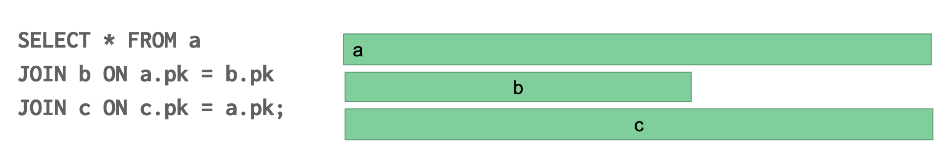
    
    - In this case, it is better to consider b first as it has a constraint (it's the same, but with a constraint). 
    - Giving constraints can speed up your query planners and find the best query.
    - When it is possible, add constraints. 
    
**Genetic Query Optimizer**
- Postgres uses this to calculate costs of queries.
- It provides a starting point and a stopping criterion for the operation.
- It allows the query plan to mutate through the possible options.
- Once the stopping criterion is satisfied, then the optimum query plan has been found.

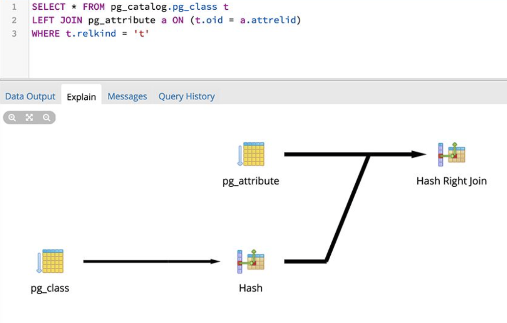

- `EXPLAIN` tab
- Basically take parts of the query out and and run them before we run the bigger query.

### Better Data Models For GitHub
- When we build our database, we build the tables first. 
    - How data is stored to disk
    - How data is read from disk

#### Building the Database

##### 1. `Authors` table
- Considered names for GitHub authors have some constraints:
    - Usernames can only contain alphanumeric characters or hyphens.
    - Usernames can’t have consecutive hyphens.
    - Maximum length is 39 characters. 

```sql
CREATE TABLE IF NOT EXISTS authors (
  authid SERIAL PRIMARY KEY,
  author VARCHAR(39),
  CONSTRAINT valid_name CHECK (author ~* ^[a-zA-Z0-9]+[a-zA-Z0-9-]*$));
```

##### 2. `repos` table

```sql
CREATE TABLE throughput.repos (
  repoid INTEGER PRIMARY KEY,
  repo VARCHAR NOT NULL,
  url text,
  created DATE NOT NULL,
  description TEXT,
  lastcommit DATE NOT NULL CHECK (lastcommit >= created),   -- Does this constraint make sense?
  commits INTEGER NOT NULL CHECK (commits >0),
  forks INTEGER NOT NULL CHECK (forks >= 0),
  isfork BOOLEAN,
  stars INTEGER NOT NULL CHECK (stars >= 0),
  issues INTEGER NOT NULL CHECK (issues >= 0),
  branches INTEGER NOT NULL CHECK (branches >= 0),
  watchers INTEGER NOT NULL CHECK (watchers >= 0)
);
```

- There are a number of repositories where the last commit is earlier than the date the repository was created
    - Some people work on their local repository first, and then create a remote repository.

#### Answering questions with `JOIN`

##### 1. “Is the number of commits likely to indicate a more comprehensive README?”
- We want all of the repos associated with `README` files (inner join repos and readmes)
- But also, we want all repositories without `README` files ($A \cup B^c$)
    - We need `LEFT JOIN`!

```sql
SELECT *
FROM   throughput.repos AS rp
LEFT JOIN throughput.readmes AS rm ON rp.repoid = rm.repoid
```

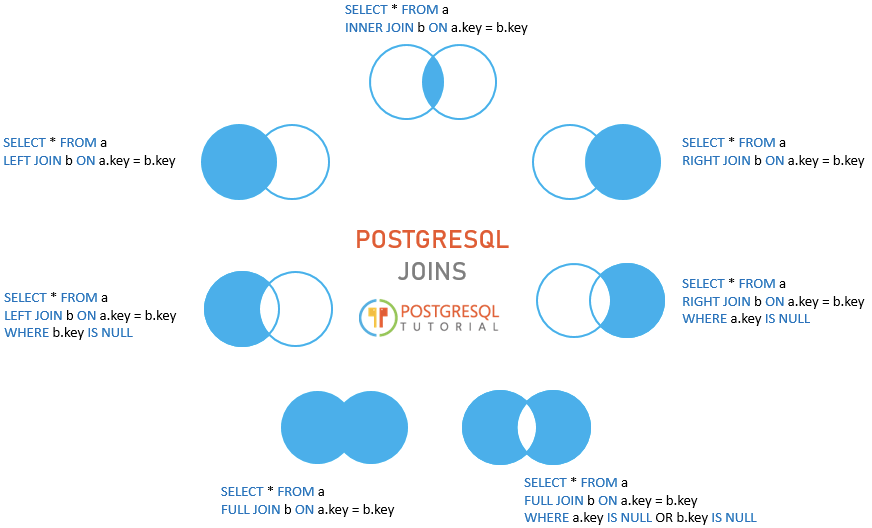

##### 2. What is happening?
- With `EXPLAIN` tool:

```code
Hash Right Join  (cost=290.53..629.18 rows=18742 width=175)
  Hash Cond: (rm.repoid = rp.repoid)
  ->  Seq Scan on readmes rm  (cost=0.00..289.42 rows=18742 width=12)
  ->  Hash  (cost=209.68..209.68 rows=6468 width=163)
        ->  Seq Scan on repos rp  (cost=0.00..209.68 rows=6468 width=163)
```

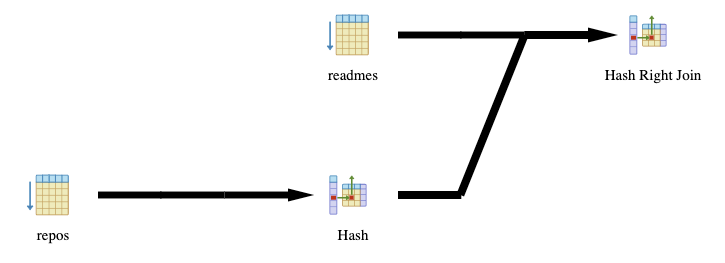

- We defined `LEFT JOIN`, but the query plan has changed that to a `RIGHT JOIN`, joining the smaller `readmes` table to the `repos` table.


##### 3. Number of badges vs number of commits

```sql
  SELECT rp.repoid, 
         rp.url, 
         rp.created, 
         rp.commits, 
         rp.stars, 
         rp.watchers,
         COALESCE(rm.headings, 0) AS headings,
         COALESCE(rm.badges, 0)   AS badges
  FROM        throughput.repos AS rp
  LEFT JOIN throughput.readmes AS rm ON rp.repoid = rm.repoid
```

- The `COALESCE` function replaces null values with 0.

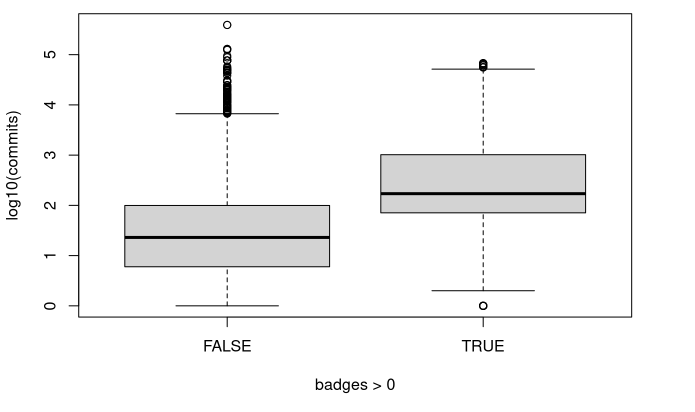

##### 4. "How many authors have contributed to repositories that are associated with multiple databases?"

```sql
SELECT DISTINCT au.author,
                COUNT(DISTINCT db.database) AS databases
FROM         throughput.databases AS db
  JOIN         throughput.dbrepos AS dbrp ON db.dbid = dbrp.dbid
  JOIN           throughput.repos AS rp   ON dbrp.repoid = rp.repoid
  JOIN throughput.repocontributor AS rc   ON rc.repoid = rp.repoid
  JOIN         throughput.authors AS au   ON au.authid = rc.authid
WHERE NOT au.author = 'NULL'
GROUP BY au.author
HAVING COUNT(DISTINCT db.database) > 1
ORDER BY databases DESC
```

- This gives us all database - repository - author combos.
- After joining tables, grouping the authors, counting number of distinct databases touched by the repositories each individual has contributed to. 


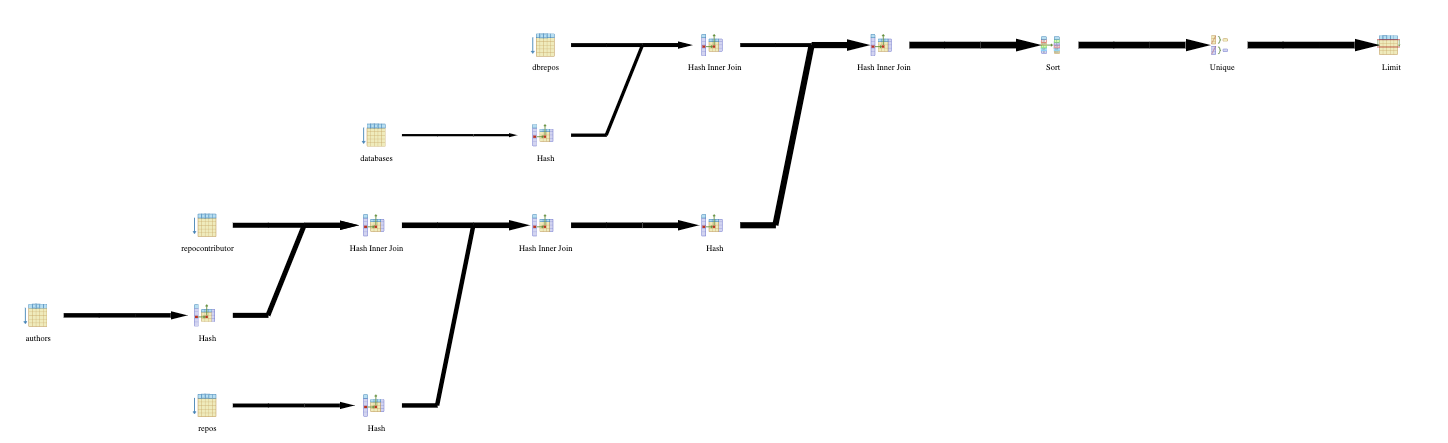